# CE613 – Assignment 2  
**Name:** Divyansh Kumar Singh  
**Roll No:** 25103041

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.optimize import bisect

## Q4 Bisection
Need roots of
$f(x)=x^4-5x^3-12x^2+76x-79$

We use the bisection method to find the root of a nonlinear equation by repeatedly halving the interval until convergence.

In [53]:
def f(x):
    return x**4 - 5*x**3 - 12*x**2 + 76*x - 79

# basic bisection
def bisection(a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        return None

    for i in range(max_iter):
        mid = (a + b) / 2
        if abs(f(mid)) < tol or abs(b - a) < tol:
            return mid

        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid

    return mid

# quick scan for sign changes
roots = []
xs = np.linspace(-10, 10, 200)

for i in range(len(xs) - 1):
    x1 = xs[i]
    x2 = xs[i + 1]
    if f(x1) * f(x2) < 0:
        r = bisection(x1, x2)
        if r is not None:
            roots.append(r)

print("roots:", roots)

roots: [np.float64(-3.9969090600708617), np.float64(1.7683866874656489), np.float64(2.240988573237281), np.float64(4.9875337993679345)]


### Plot

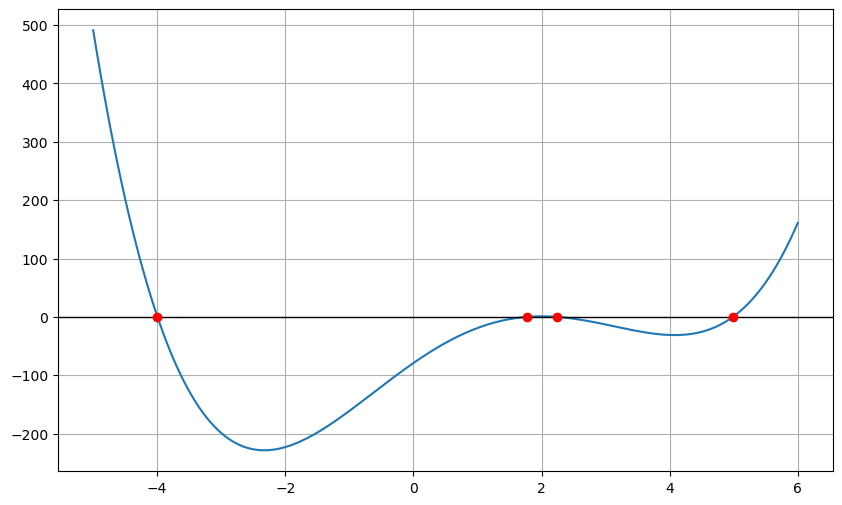

In [54]:
plt.figure(figsize=(10, 6))
x = np.linspace(-5, 6, 200)
y = f(x)

plt.plot(x, y)
plt.axhline(0, color="k", lw=1)

for r in roots:
    plt.plot(r, f(r), "ro")

plt.grid(True)
plt.show()

### scipy check

In [55]:
intervals = [(-5, -3), (1, 2), (2, 3), (4, 6)]

print("scipy:")
for a, b in intervals:
    r = bisect(f, a, b)
    print(a, b, "->", round(r, 6))

scipy:
-5 -3 -> -3.996909
1 2 -> 1.768387
2 3 -> 2.240989
4 6 -> 4.987534


## Q5 Linear regression
Data file: regression_input.csv (x and y are in rows)

### Manual linear regression

In [56]:
path = "regression_input.csv"

df = pd.read_csv(path, header=None).T
df.columns = ["x", "y"]

# drop header row if present
if isinstance(df.iloc[0]["x"], str):
    df = df.iloc[1:].reset_index(drop=True)

df["x"] = pd.to_numeric(df["x"])
df["y"] = pd.to_numeric(df["y"])

df.head()

,x,y
0,300.0,1.0045
1,400.0,1.0134
2,500.0,1.0296
3,600.0,1.0507
4,700.0,1.0743


### Normal equation
$\theta = (X^T X)^{-1} X^T y$

In [57]:
n = len(df)
x = df["x"].values
y = df["y"].values

X = np.column_stack([np.ones(n), x])
Y = y.reshape(-1, 1)

theta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
a0 = theta[0, 0]
a1 = theta[1, 0]

print("a0 =", a0)
print("a1 =", a1)

a0 = 0.9331940476190486
a1 = 0.00020529761904762057


### Library-based regression (verification)

In [58]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x.reshape(-1, 1), y)

print("sklearn a0 =", m.intercept_)
print("sklearn a1 =", m.coef_[0])

sklearn a0 = 0.9331940476190478
sklearn a1 = 0.000205297619047619


### plot + save

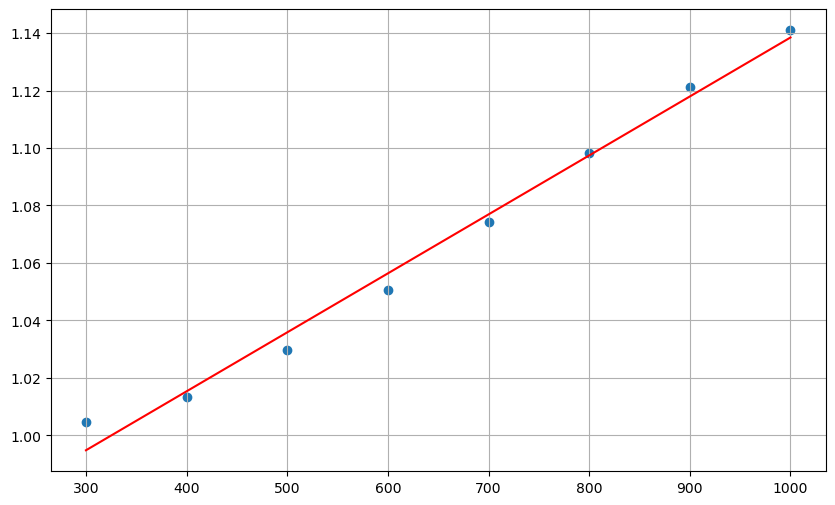

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, a0 + a1 * x, "r")
plt.grid(True)
plt.show()

out = pd.DataFrame({"param": ["a0", "a1"], "value": [a0, a1]})
out.to_csv("linear_regression_results.csv", index=False)

## Q6 Sums (loop vs vector)
The following comparison shows the difference between loop-based and vectorized computation.

In [60]:
# a) sum of squares
print("part A")

t0 = time.time()
s = 0
for i in range(1, 1001):
    s += i**2
t1 = time.time()
print("loop:", s, "time:", round(t1 - t0, 6))

t0 = time.time()
arr = np.arange(1, 1001)
s2 = np.sum(arr**2)
t1 = time.time()
print("vec:", s2, "time:", round(t1 - t0, 6))

part A
loop: 333833500 time: 0.000286
vec: 333833500 time: 0.000252


In [61]:
# b) alternating sum
print("\npart B")
N = 502

t0 = time.time()
s = 0
for k in range(N):
    s += ((-1)**k) / (2*k + 1)
t1 = time.time()
print("loop:", round(s, 6), "time:", round(t1 - t0, 6))

t0 = time.time()
k = np.arange(N)
terms = ((-1.0)**k) / (2*k + 1)
s2 = np.sum(terms)
t1 = time.time()
print("vec:", round(s2, 6), "time:", round(t1 - t0, 6))


part B
loop: 0.7849 time: 0.000286
vec: 0.7849 time: 0.000258


In [62]:
# c) product series
print("\npart C")
count = 500
import time
import numpy as np

# for-loop 
to = time.time()
s = 0.0
for k in range(1, count + 1):
    s += 1.0 / ((2*k - 1)**2 * (2*k + 1)**2)
t1 = time.time()
print("loop:", round(s, 6), "time:", round(t1 - to, 6))

# vectorized 
to = time.time()
k = np.arange(1, count + 1)
terms = 1.0 / ((2*k - 1)**2 * (2*k + 1)**2)
s2 = np.sum(terms)
t1 = time.time()
print("vec :", round(s2, 6), "time:", round(t1 - to, 6))


part C
loop: 0.11685 time: 0.000338
vec : 0.11685 time: 0.000216


# Matplotlib questions and solutions

## Q1 (Pyplot tutorial)

**Question:** "Also add yellow colored dotted line for sqrt(t) and add legends as well."

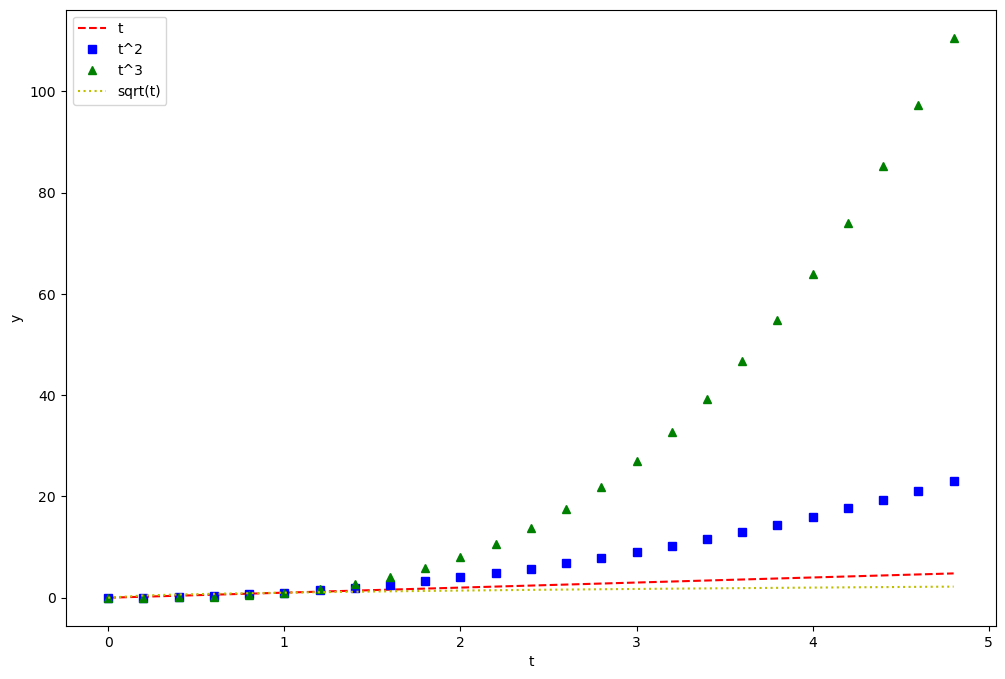

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', label='t')
plt.plot(t, t**2, 'bs', label='t^2')
plt.plot(t, t**3, 'g^', label='t^3')

plt.plot(t, np.sqrt(t), 'y:', label='sqrt(t)')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## Q2 (Categorical plotting)

**Question:** "Plot these graphs in vertically" (the bar, scatter, and line plots for names/values).

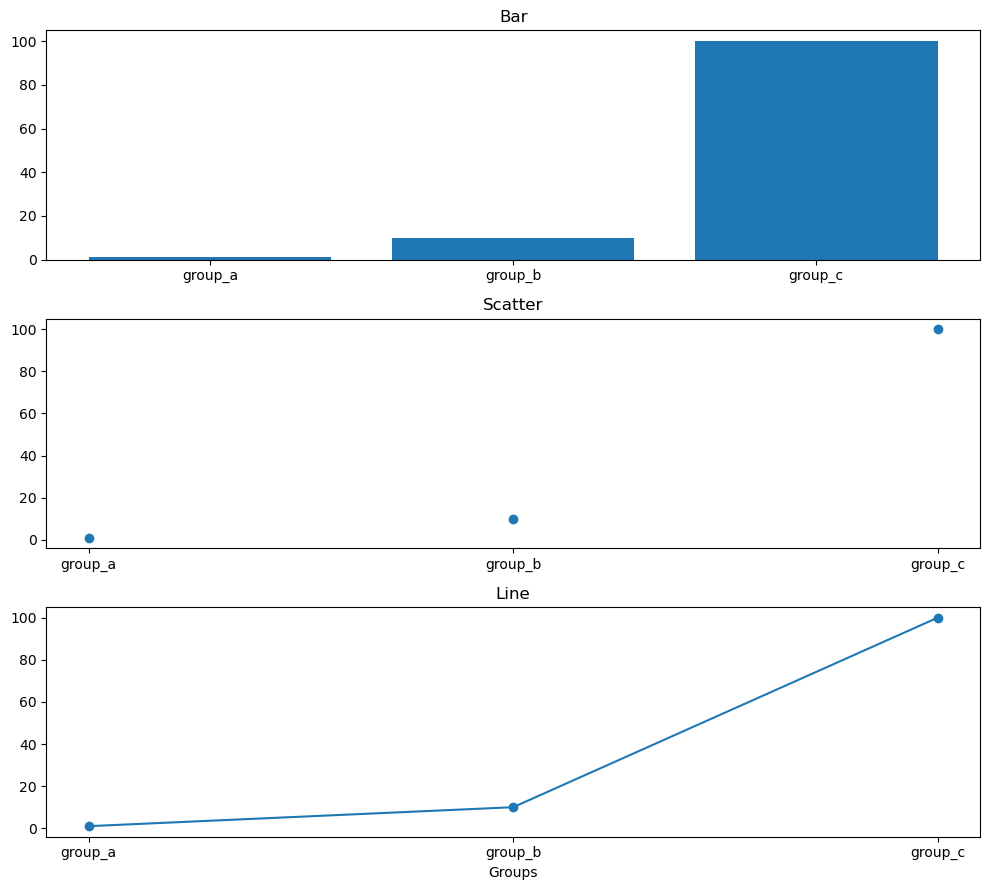

In [73]:
import matplotlib.pyplot as plt

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(10, 9))

plt.subplot(3, 1, 1)
plt.bar(names, values)
plt.title('Bar')

plt.subplot(3, 1, 2)
plt.scatter(names, values)
plt.title('Scatter')

plt.subplot(3, 1, 3)
plt.plot(names, values, marker='o')
plt.title('Line')
plt.xlabel('Groups')

plt.tight_layout()
plt.show()

## Q3 (Annotating text)

**Question:** "Also show local minima and a dotted black line for mean" (on the cosine plot with a local max annotation).

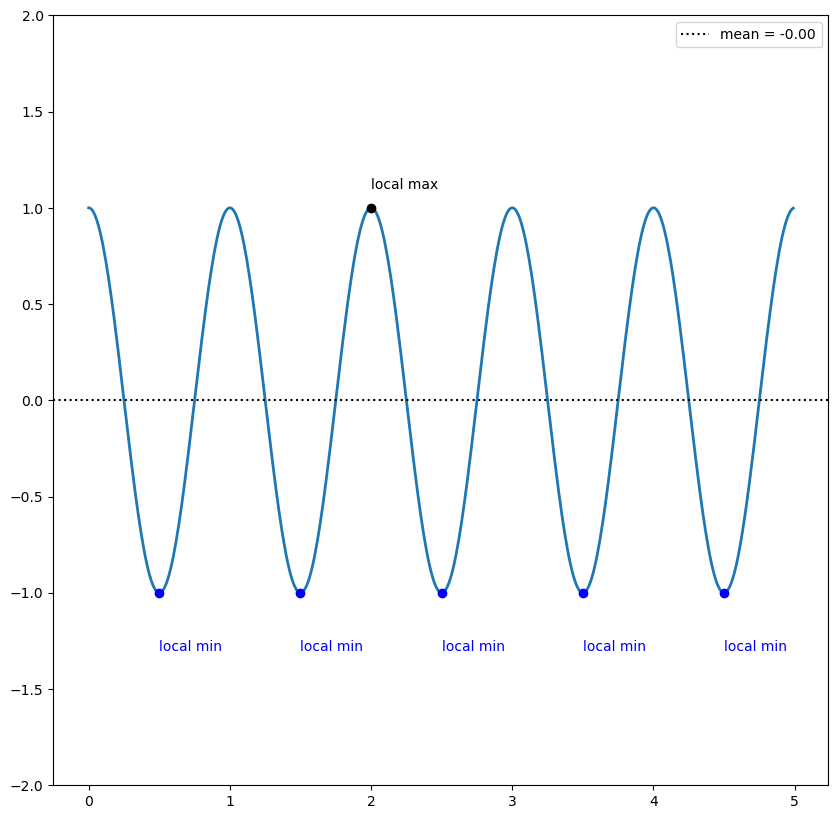

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)

plt.plot(2, 1, 'ko')
plt.text(2, 1.1, 'local max')

# dotted black line for mean
mean_val = s.mean()
plt.axhline(mean_val, color='k', linestyle=':', label=f'mean = {mean_val:.2f}')

min_idx = []
for i in range(1, len(s) - 1):
    if s[i] < s[i-1] and s[i] < s[i+1]:
        min_idx.append(i)

for idx in min_idx:
    plt.plot(t[idx], s[idx], 'bo')
    plt.text(t[idx], s[idx] - 0.3, 'local min', color='blue')

plt.ylim(-2, 2)
plt.legend()
plt.show()

# Pandas questions and solutions

All from the **" pandas"** tutorial.

## Q1

**Question:** "Add another column G containing your roll" (after df2 is printed)

In [66]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=[0, 1, 2, 3], dtype='float32'),
    'D': np.array([3, 3, 3, 3], dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

df2['G'] = ['251030041', '251030041', '251030041', '251030041']
print(df2)

     A          B    C  D      E    F          G
0  1.0 2013-01-02  1.0  3   test  foo  251030041
1  1.0 2013-01-02  1.0  3  train  foo  251030041
2  1.0 2013-01-02  1.0  3   test  foo  251030041
3  1.0 2013-01-02  1.0  3  train  foo  251030041


## Q2

**Question:** Print first 4 rows only

In [67]:
# print first 4 rows only
df2.head(4)

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,test,foo,251030041
1,1.0,2013-01-02,1.0,3,train,foo,251030041
2,1.0,2013-01-02,1.0,3,test,foo,251030041
3,1.0,2013-01-02,1.0,3,train,foo,251030041


## Q3

**Question:** Print last 5 rows only

In [68]:
# print last 5 rows only
df2.tail(5)

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,test,foo,251030041
1,1.0,2013-01-02,1.0,3,train,foo,251030041
2,1.0,2013-01-02,1.0,3,test,foo,251030041
3,1.0,2013-01-02,1.0,3,train,foo,251030041


## Q4

**Question:** Sort descending by 'D'

In [69]:
# sort by column 'D' in descending order
df2.sort_values(by='D', ascending=False)

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,test,foo,251030041
1,1.0,2013-01-02,1.0,3,train,foo,251030041
2,1.0,2013-01-02,1.0,3,test,foo,251030041
3,1.0,2013-01-02,1.0,3,train,foo,251030041


## Q5

**Question:** Select first 3 rows

In [70]:
# select first 3 rows
df2[0:3]

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,test,foo,251030041
1,1.0,2013-01-02,1.0,3,train,foo,251030041
2,1.0,2013-01-02,1.0,3,test,foo,251030041


# NumPy question and solution

## Q1

**Question:** "Convert a in a row vector and print the same" (for `a` which is 3×4).

In [71]:
import numpy as np

a = np.floor(10 * np.random.random((3, 4)))
print("Original a:\n", a)
print("Original shape:", a.shape)

# convert a to a row vector (1 x 12)
row_vec = a.reshape(1, -1)
print("Row vector:\n", row_vec)
print("Row vector shape:", row_vec.shape)

Original a:
 [[0. 4. 7. 5.]
 [6. 7. 4. 9.]
 [9. 7. 8. 1.]]
Original shape: (3, 4)
Row vector:
 [[0. 4. 7. 5. 6. 7. 4. 9. 9. 7. 8. 1.]]
Row vector shape: (1, 12)
